# Data Cleaning

## The Data Source Bank

The data source bank is a report with a number of transactions that have not just our transactions but other banks' too. 

In [1]:
#Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#Loading in dataset

df = pd.read_csv('PD 2023 Wk 1 Input.csv')
df.head()


,Transaction Code,Value,Customer Code,Online or In-Person,Transaction Date
0,DTB-716-679-576,1448,100001,2,20/03/2023 00:00:00
1,DS-795-814-303,7839,100001,2,15/11/2023 00:00:00
2,DSB-807-592-406,5520,100005,1,14/07/2023 00:00:00
3,DS-367-545-264,7957,100007,2,18/08/2023 00:00:00
4,DSB-474-374-857,5375,100000,2,26/08/2023 00:00:00


In [20]:
#Checking for null and duplicated values

df.info()
#There are no null values

df.duplicated().sum()
#There are no duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Transaction Code     365 non-null    object
 1   Value                365 non-null    int64 
 2   Customer Code        365 non-null    int64 
 3   Online or In-Person  365 non-null    int64 
 4   Transaction Date     365 non-null    object
dtypes: int64(3), object(2)
memory usage: 14.4+ KB


0

I need to split the Transaction Code to extract the letters at the start of the transaction code. These identify the bank who processes the transaction.

In [3]:
# Extracting the letters from the transaction code

split= df['Transaction Code'].str.split('-', n=1, expand=True)

# Creating a new column for the bank
df['Bank'] = split[0]

df.head()





,Transaction Code,Value,Customer Code,Online or In-Person,Transaction Date,Bank
0,DTB-716-679-576,1448,100001,2,20/03/2023 00:00:00,DTB
1,DS-795-814-303,7839,100001,2,15/11/2023 00:00:00,DS
2,DSB-807-592-406,5520,100005,1,14/07/2023 00:00:00,DSB
3,DS-367-545-264,7957,100007,2,18/08/2023 00:00:00,DS
4,DSB-474-374-857,5375,100000,2,26/08/2023 00:00:00,DSB


In [4]:
#Renaming the values in the Online or In-person field, Online of the 1 values and In-Person for the 2 values. 
df['Online or In-Person'] = df['Online or In-Person'].replace({1: 'Online', 2:'In-Person'})
df.head()

,Transaction Code,Value,Customer Code,Online or In-Person,Transaction Date,Bank
0,DTB-716-679-576,1448,100001,In-Person,20/03/2023 00:00:00,DTB
1,DS-795-814-303,7839,100001,In-Person,15/11/2023 00:00:00,DS
2,DSB-807-592-406,5520,100005,Online,14/07/2023 00:00:00,DSB
3,DS-367-545-264,7957,100007,In-Person,18/08/2023 00:00:00,DS
4,DSB-474-374-857,5375,100000,In-Person,26/08/2023 00:00:00,DSB


In [5]:
#Importing Datetime library so that I can extract the day 
import datetime as dt

In [6]:
#Changing the Transaction Date to be the day name

df['Transaction Date'] = pd.to_datetime(df['Transaction Date']).dt.day_name()
df.head()


,Transaction Code,Value,Customer Code,Online or In-Person,Transaction Date,Bank
0,DTB-716-679-576,1448,100001,In-Person,Monday,DTB
1,DS-795-814-303,7839,100001,In-Person,Wednesday,DS
2,DSB-807-592-406,5520,100005,Online,Friday,DSB
3,DS-367-545-264,7957,100007,In-Person,Friday,DS
4,DSB-474-374-857,5375,100000,In-Person,Saturday,DSB


In [7]:
#Total Values of Transactions by each bank
total_1 = df.groupby('Bank')['Value'].sum().reset_index()

total_1

,Bank,Value
0,DS,653940
1,DSB,530489
2,DTB,618238


Text(0, 0.5, 'Total Value')

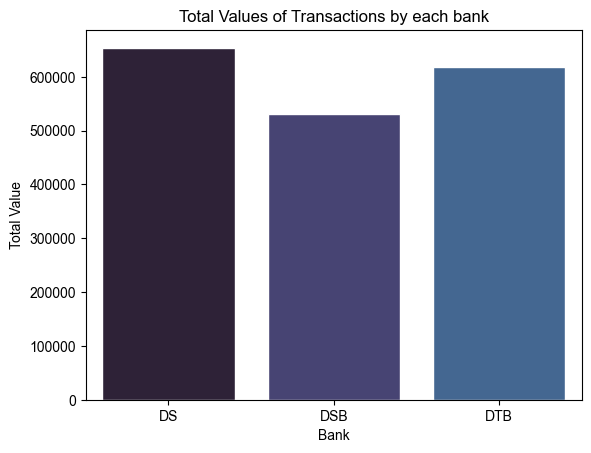

In [8]:
fig, ax = plt.subplots()
sns.set_theme(style='darkgrid')
sns.set_palette('mako')

sns.barplot(data=total_1, x='Bank', y='Value')
ax.set_title('Total Values of Transactions by each bank')
ax.set_ylabel('Total Value')

In [9]:
# Total Values by Bank, Day of the Week and Type of Transaction (Online or In-Person)

total_2 = df.groupby(['Bank', 'Online or In-Person', 'Transaction Date'])[['Value']].sum().sort_values(by='Value', ascending=True).reset_index()
total_2.head()

,Bank,Online or In-Person,Transaction Date,Value
0,DS,Online,Thursday,11448
1,DSB,In-Person,Tuesday,13564
2,DSB,Online,Sunday,13701
3,DTB,Online,Friday,19467
4,DTB,In-Person,Monday,25951


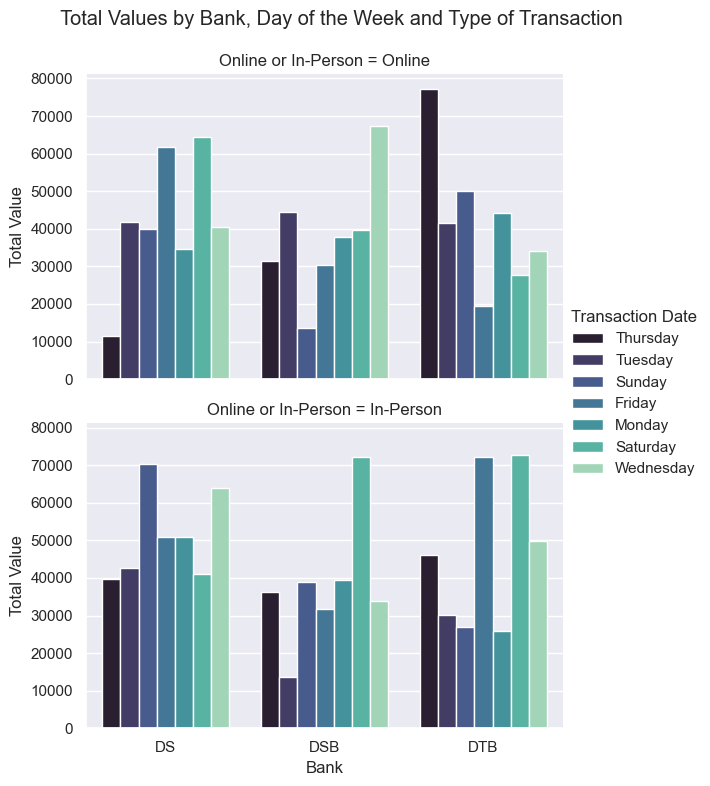

In [10]:

sns.set_palette('magma')
cp = sns.catplot(data=total_2, x='Bank', y='Value', hue='Transaction Date',kind='bar', row='Online or In-Person', palette='mako',
           height=4, aspect=1.5).set(ylabel='Total Value')
cp.fig.suptitle(' Total Values by Bank, Day of the Week and Type of Transaction')
cp.fig.subplots_adjust(top=0.9)
plt.show()

In [14]:
#Total Values by Bank and Customer Code
total_3 = df.groupby(['Bank', 'Customer Code'])['Value'].sum().reset_index()
total_3.head()

,Bank,Customer Code,Value
0,DS,100000,57909
1,DS,100001,53063
2,DS,100002,69803
3,DS,100003,25482
4,DS,100004,63315


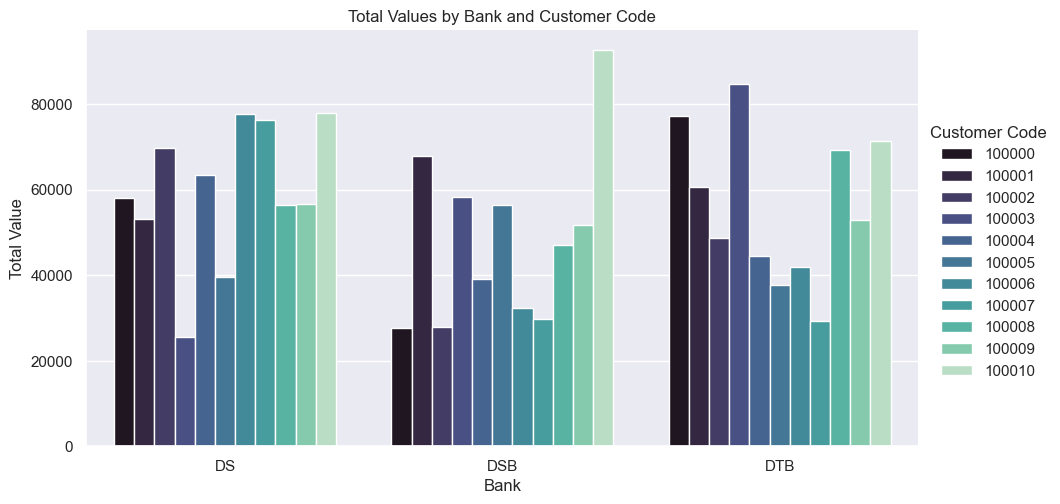

In [12]:
sns.catplot(data=total_3, x='Bank', y='Value', hue='Customer Code', kind='bar', palette='mako', aspect=1.9).set(title='Total Values by Bank and Customer Code', ylabel='Total Value')

plt.show()